# Finding natural neighbors in a triangulation 

A triangle is a natural neighbor of a point if that point is within a circumradius of the circumcenter of a circumscribed circle containing the triangle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
from scipy.spatial import Delaunay

from metpy.gridding.triangles import find_natural_neighbors 

Create test observations, test points, and plot the triangulation and points.

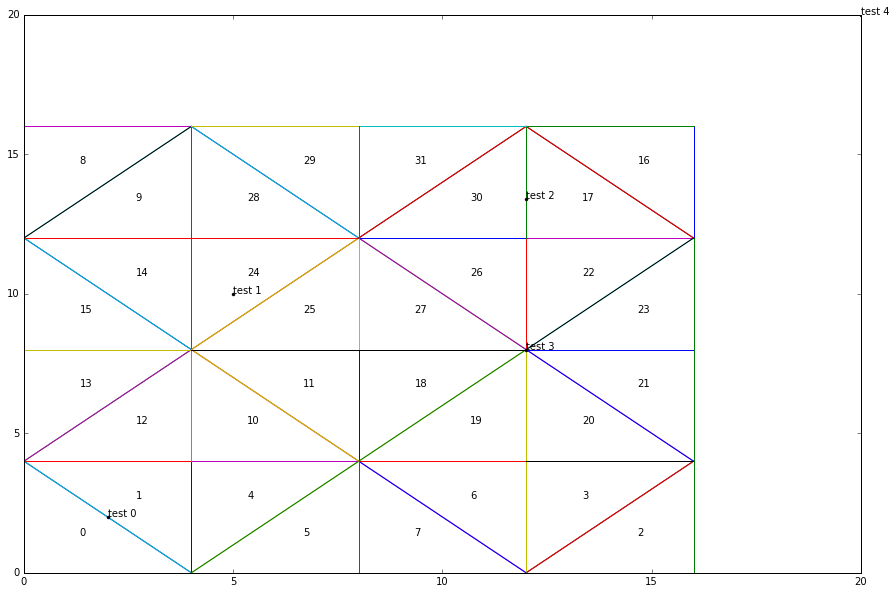

In [2]:
x = list(range(0, 20, 4))
y = list(range(0, 20, 4))
gx, gy = np.meshgrid(x, y)
pts = np.vstack([gx.ravel(), gy.ravel()]).T
tri = Delaunay(pts)

grids = np.random.randint(0, 10, (5, 2))

for i in range(len(tri.simplices)):
    
    x, y = tri.points[tri.simplices[i]].T
    
    for j in range(3):
        plt.plot([x[j], x[(j+1)%3]], [y[j], y[(j+1)%3]])
    
    xave = np.mean(x)
    yave = np.mean(y)
    
    plt.annotate(str(i), xy=(xave, yave))

test_points = np.array([[2, 2], [5, 10], [12, 13.4], [12, 8], [20, 20]])

for i in range(len(test_points)):
    x = test_points[i][0]
    y = test_points[i][1]
    
    plt.plot(x, y, "k.", markersize=6)
    plt.annotate("test " + str(i), xy=(x, y))

Since finding natural neighbors already calculates circumcenters and circumradii, return that information for later use.

The key of the neighbors dictionary refers to the test point index, and the list of integers are the triangles that are natural neighbors of that particular test point.

Since point 4 is far away from the triangulation, it has no natural neighbors.  Point 3 is at the confluence of several triangles so it has many natural neighbors.

In [3]:
neighbors, tri_info = find_natural_neighbors(tri, test_points)

neighbors

{0: [0, 1],
 1: [24, 25],
 2: [16, 17, 30, 31],
 3: [18, 19, 20, 21, 22, 23, 26, 27],
 4: []}

We can then use the information in tri_info later.

The dictionary key is the index of a particular triangle in the Delaunay triangulation data structure.  'cc' is that triangle's circumcenter, and 'r' is the radius of the circumcircle containing that triangle.

Using circumcenter and radius information from tri_info, plot circumcircles and circumcenters for each triangle.

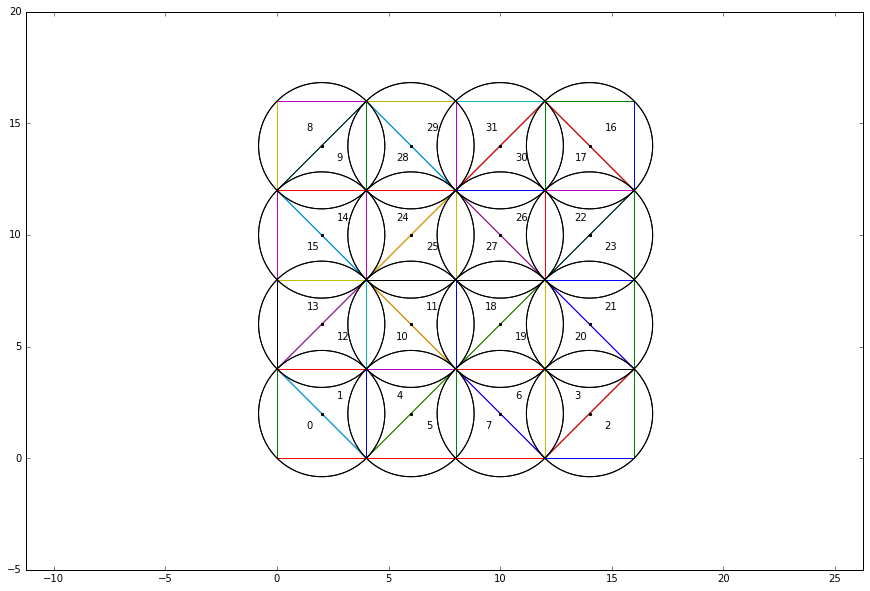

In [4]:
def draw_circle(x, y, r, m, label):
    
    nx = x + r * np.cos(np.deg2rad(list(range(360))))
    ny = y + r * np.sin(np.deg2rad(list(range(360))))

    plt.plot(nx, ny, m, label=label)

for i in range(len(tri.simplices)):
    
    x, y = tri.points[tri.simplices[i]].T
    
    for j in range(3):
        plt.plot([x[j], x[(j+1)%3]], [y[j], y[(j+1)%3]])
    
    xave = np.mean(x)
    yave = np.mean(y)
    
    plt.annotate(str(i), xy=(xave, yave))

for idx, (item) in tri_info.items():
    
    plt.plot(item['cc'][0], item['cc'][1], "k.", markersize=5)
    draw_circle(item['cc'][0], item['cc'][1], item['r'], "k-", "")

plt.axes().set_aspect('equal', 'datalim')